
1.For dataset “gifted.csv”: 

------------------------------------------------
1.1 Construct different linear regression models using “step” function with Y = __score__ in test of analytical skills as a dependent variable, and independent variables:fatheriq，motheriq，speak，count，read，edutv，cartoons

1.2 Verify if the coefficients of linear regression model are significant.  

1.3 Choose the best model using AIC statistics. 

1.4 Test if the linear regression model is significant in general.  
--------------------------------------------

data requirements:

1.5 Test the homoscedasticity of the model. (Гомоскедастичность - постоянная изменчивость остатков на всех уровнях независимой переменной)

- H0: $D_{e_1} = D_{e_2} = ... = D_{e_i}$ - homoscedasticity
- H1: $D_{e_1} \neq D_{e_2} \neq ... \neq D_{e_i}$ - heteroscedasticity
- Using test Breusch-Pagan 

---------------------------------------------------------
1.6 Test the autocorrelation of residuals. 

-------------------------------------------------------

1.7 Test multicollinearity.

---------------------------------------------------------
1.8 Test the normality of residuals. 

1.9 Use Box-Cox transformation to improve the model. 

1.10 What is the “best” model? Advantages and disadvantages of the best model? 

--------------------------------------



In [1]:
file_path = "../data/gifted.csv"

gifted = read.csv(file_path)

head(gifted, 3)
tail(gifted, 3)

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,159,115,117,18,26,1.9,3.00,2.00
2,164,117,113,20,37,2.5,1.75,3.25
3,154,115,118,20,32,2.2,2.75,2.50


,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
34,162,119,113,23,28,2.1,1.25,3.50
35,164,111,121,18,36,2.3,1.00,4.50
36,159,114,123,20,30,2.2,1.75,3.25


## Build models, choose the best one and verify the significance of the coeff of the model


### Build model using all variables y ~ $x_1, ...., x_n$

In [4]:
# Полная модель с использованием всех предикторов
fit_full <- lm(score ~ ., data = gifted)
summary(fit_full)


Call:
lm(formula = score ~ ., data = gifted)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8064 -1.5898  0.0479  1.7474  5.2905 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 75.50849   24.02618   3.143  0.00393 ** 
fatheriq     0.25249    0.13756   1.835  0.07707 .  
motheriq     0.40007    0.07291   5.488 7.33e-06 ***
speak        0.18764    0.14767   1.271  0.21429    
count        0.20649    0.26631   0.775  0.44462    
read         7.54405    5.58640   1.350  0.18769    
edutv       -4.20244    2.24503  -1.872  0.07170 .  
cartoons    -3.33899    2.01808  -1.655  0.10919    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.591 on 28 degrees of freedom
Multiple R-squared:  0.7496,	Adjusted R-squared:  0.687 
F-statistic: 11.97 on 7 and 28 DF,  p-value: 5.803e-07


### Automatically checking models (using step - function)

In [5]:
#pairs(score ~ ., data = gifted)
optimal_fit = step(
    fit_full, 
    direction = 'both' #  и в сторону уменьшения предикторов и в сторону увеличения
    )

Start:  AIC=75.49
score ~ fatheriq + motheriq + speak + count + read + edutv + 
    cartoons

           Df Sum of Sq    RSS    AIC
- count     1     4.034 191.94 74.251
<none>                  187.90 75.486
- speak     1    10.836 198.74 75.505
- read      1    12.238 200.14 75.758
- cartoons  1    18.371 206.27 76.844
- fatheriq  1    22.609 210.51 77.577
- edutv     1    23.514 211.42 77.731
- motheriq  1   202.081 389.98 99.773

Step:  AIC=74.25
score ~ fatheriq + motheriq + speak + read + edutv + cartoons

           Df Sum of Sq    RSS    AIC
- speak     1     7.829 199.77 73.690
<none>                  191.94 74.251
+ count     1     4.034 187.90 75.486
- fatheriq  1    21.119 213.06 76.009
- cartoons  1    22.467 214.40 76.236
- edutv     1    29.657 221.59 77.424
- read      1   182.630 374.57 96.321
- motheriq  1   214.969 406.91 99.302

Step:  AIC=73.69
score ~ fatheriq + motheriq + read + edutv + cartoons

           Df Sum of Sq    RSS    AIC
<none>                  199.77

### Chosing the best model and verify significance of the coeff
----------------------------
__Conclusion:__
- Final model contains variables: fatheriq + motheriq + read + edutv + cartoons. Why we dropped another variables? -Because another variables maximise AIC (For the full model AIC=75.49 and for the final model AIC=74.25)

- Significance of the coefficients of our linear model expain from p - value:
  - If p - value > 0.5 => not significant (fatheriq, cartoons)
  - If p - value < 0.5 => significant (motheriq, read, edutv)

- Significance of the linear regression model in general:
    - H0: $b_1 = b_2 = ... = b_5 = 0$ - model is not significant
    - H1: $\exists b_i \neq 0$
    - Using F-test (or t-test if there is only one independent variable) find p-value
        - In our case p-value < 0.05 => we can reject NULL hypothesis.


In [6]:
summary(optimal_fit)


Call:
lm(formula = score ~ fatheriq + motheriq + read + edutv + cartoons, 
    data = gifted)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1624 -1.6730  0.1607  1.3263  6.4122 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 79.04678   23.73961   3.330  0.00231 ** 
fatheriq     0.23736    0.13639   1.740  0.09206 .  
motheriq     0.41211    0.07177   5.742 2.87e-06 ***
read        11.90132    2.17231   5.479 6.03e-06 ***
edutv       -4.88814    2.16155  -2.261  0.03114 *  
cartoons    -3.82023    1.96759  -1.942  0.06163 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.58 on 30 degrees of freedom
Multiple R-squared:  0.7338,	Adjusted R-squared:  0.6894 
F-statistic: 16.54 on 5 and 30 DF,  p-value: 7.669e-08


## Homoscedasticity of residuals
(Гомоскедастичность - постоянная изменчивость остатков на всех уровнях независимой переменной)

- H0: $D_{e_1} = D_{e_2} = ... = D_{e_i}$ - homoscedasticity
- H1: $D_{e_1} \neq D_{e_2} \neq ... \neq D_{e_i}$ - heteroscedasticity
- Using test Breusch-Pagan define p-value 

-----------------------------
__Conclusion:__
- For our optimal model Breusch-Pagan test showed p-value > 0.05 => we cant reject NULL hypothesis => our model probably is Homoscedasticity.

In [9]:
library(lmtest)
bptest(optimal_fit)


	studentized Breusch-Pagan test

data:  optimal_fit
BP = 2.6717, df = 5, p-value = 0.7504


## Autocorrelation of residuals

Since that we have equation for residuals $e_i = p*e_{i-1}+v_i$, we might check whether $p = 0$ which maens that there is no autocorrelation.
- H0: $p = 0$ - no autocorrelation
- H1: $p \neq 0$ - autocorrelation
- Usind Durbin-Watson Test

--------------------------------------
__Conclusion:__
- Durbin-Watson Test showed p-value > 0.05 => we cant reject NULL hypothesis, which means there is no significant autocorrelation


In [10]:
library(lmtest)
dwtest(optimal_fit)


	Durbin-Watson test

data:  optimal_fit
DW = 1.6197, p-value = 0.123
alternative hypothesis: true autocorrelation is greater than 0


## Multicollinearity

- Calculate $VIF(b_k)$ coefficients for all independent variables
- If $VIF(b_k)$ < 10 we can conclude that that multicollinearity is not exists

---------------------------------------------------
__Conclusion:__
- Since VIF < 10 for all variables in our model, multicollinearity doesnt exists


In [13]:
library(carData)
vif(optimal_fit)

fatheriq motheriq     read    edutv cartoons 
1.185119 1.145530 1.051000 7.674470 8.021439

## The normality of residuals

- Use Shapiro-Wilc test for residuals of the model
  - H0: Normal distribution
  - H1: Not normal distribution

-----------------------------------------------------
__Conclusion:__
- Shapiro-Wilk normality test gave p-value > 0.05 => we cant reject NULL hypothesis

In [14]:
reisduals_vector = residuals(optimal_fit, type="response") # определяем вектор остатков
shapiro.test(reisduals_vector) 


	Shapiro-Wilk normality test

data:  reisduals_vector
W = 0.97689, p-value = 0.6398


## BoxCox transformation

---------------------------
__Conclusion:__
- Residual standard error: 0.0008714 becomes much less than in the first model 
- R-squared 0.6911 which is a little higher than the first model
- Same variables (compare with the first model) are still significant
- So as the conclusion it seems that it is better to choose second model (after box-cox transfromation) to describe this data

[1] 75

[1] 0.989899


Call:
lm(formula = score ~ fatheriq + motheriq + read + edutv + cartoons, 
    data = gifted)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.071e-03 -4.606e-04 -8.026e-05  5.573e-04  1.438e-03 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.652e-01  8.017e-03  20.608  < 2e-16 ***
fatheriq    -8.256e-05  4.606e-05  -1.792   0.0832 .  
motheriq    -1.412e-04  2.424e-05  -5.825 2.27e-06 ***
read        -4.023e-03  7.336e-04  -5.484 5.94e-06 ***
edutv        1.602e-03  7.300e-04   2.195   0.0360 *  
cartoons     1.259e-03  6.645e-04   1.894   0.0679 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0008714 on 30 degrees of freedom
Multiple R-squared:  0.7352,	Adjusted R-squared:  0.6911 
F-statistic: 16.66 on 5 and 30 DF,  p-value: 7.071e-08


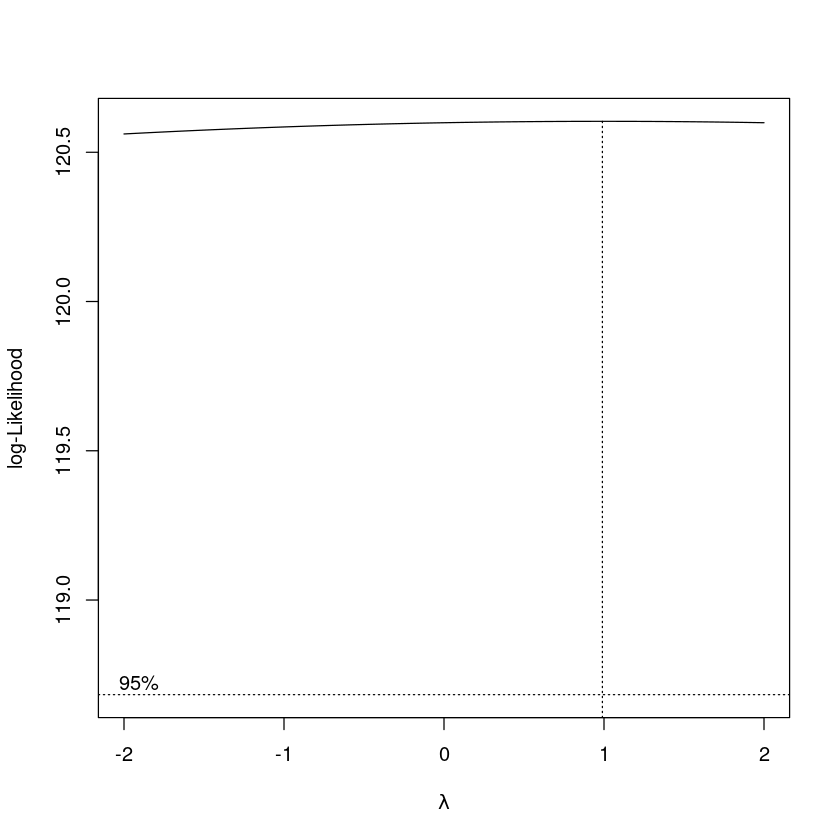

In [20]:
library(MASS)
boxcox = boxcox(optimal_fit) # посмотрим на графике

# найдем точное значение лямбды (на оси х)
# оно дает наибольшее значение функции правдоподобия
which.max(boxcox$y)
lambda = boxcox$x[which.max(boxcox$y)]
lambda

# теперь преобразуем нашу зависимую перменную, возводя ее в степень лямбда
temp = gifted$score^lambda
gifted$score = temp

# строим новую модель
fit2 = lm(score~ fatheriq + motheriq + read + edutv + cartoons, data=gifted)
summary(fit2)



2.For dataset “Real estate.csv”: 
#This real estate dataset includes the date of purchase, house age, location, distance to nearest MRT station, number of convenience stores and house price of unit area. 

2.1 Construct the linear regression model with y= house price of unit area and independent variables: house age, distance to nearest MRT station, number of convenience stores.

2.2 Verify if the coefficients of linear regression model are significant.

2.3 Choose the best model using AIC statistics. 

2.4 Test if the linear regression model is significant in general.  

2.5 Test the homoscedasticity of the model. 

2.6 Test the autocorrelation of residuals. 

2.7 Test multicollinearity. 

2.8 Test the normality of residuals. 

2.9 Use Box-Cox transformation to improve the model. 

2.10 What is the “best” model? Advantages and disadvantages of the best model?

In [32]:
#2.For dataset “Real estate.csv”: 
#This real estate dataset includes the date of purchase, house age, location, distance to nearest MRT station, number of convenience stores and house price of unit area. 
file_path = "../data/Realestate.csv"

realEstate = read.csv(file_path)

head(realEstate, 3)




#2.1 Construct the linear regression model with y= house price of unit area and independent variables: house age, distance to nearest MRT station, number of convenience stores.
fit1 <- lm(Y.house.price.of.unit.area ~ X2.house.age + X3.distance.to.the.nearest.MRT.station + X4.number.of.convenience.stores, data = realEstate)
summary(fit1)

#2.2 Verify if the coefficients of linear regression model are significant.

#2.3 Choose the best model using AIC statistics. 
#pairs(score ~ ., data = gifted)
optimal_fit = step(
    fit1, 
    direction = 'both' #  и в сторону уменьшения предикторов и в сторону увеличения
    )

summary(optimal_fit)
#2.4 Test if the linear regression model is significant in general.  


,No,X1.transaction.date,X2.house.age,X3.distance.to.the.nearest.MRT.station,X4.number.of.convenience.stores,X5.latitude,X6.longitude,Y.house.price.of.unit.area
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3



Call:
lm(formula = Y.house.price.of.unit.area ~ X2.house.age + X3.distance.to.the.nearest.MRT.station + 
    X4.number.of.convenience.stores, data = realEstate)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.304  -5.430  -1.738   4.325  77.315 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            42.977286   1.384542  31.041  < 2e-16
X2.house.age                           -0.252856   0.040105  -6.305 7.47e-10
X3.distance.to.the.nearest.MRT.station -0.005379   0.000453 -11.874  < 2e-16
X4.number.of.convenience.stores         1.297443   0.194290   6.678 7.91e-11
                                          
(Intercept)                            ***
X2.house.age                           ***
X3.distance.to.the.nearest.MRT.station ***
X4.number.of.convenience.stores        ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.251 on 410 degrees of freedom
Mult

Start:  AIC=1846.09
Y.house.price.of.unit.area ~ X2.house.age + X3.distance.to.the.nearest.MRT.station + 
    X4.number.of.convenience.stores

                                         Df Sum of Sq   RSS    AIC
<none>                                                35091 1846.1
- X2.house.age                            1    3402.1 38493 1882.4
- X4.number.of.convenience.stores         1    3816.7 38908 1886.8
- X3.distance.to.the.nearest.MRT.station  1   12066.4 47157 1966.5



Call:
lm(formula = Y.house.price.of.unit.area ~ X2.house.age + X3.distance.to.the.nearest.MRT.station + 
    X4.number.of.convenience.stores, data = realEstate)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.304  -5.430  -1.738   4.325  77.315 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            42.977286   1.384542  31.041  < 2e-16
X2.house.age                           -0.252856   0.040105  -6.305 7.47e-10
X3.distance.to.the.nearest.MRT.station -0.005379   0.000453 -11.874  < 2e-16
X4.number.of.convenience.stores         1.297443   0.194290   6.678 7.91e-11
                                          
(Intercept)                            ***
X2.house.age                           ***
X3.distance.to.the.nearest.MRT.station ***
X4.number.of.convenience.stores        ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.251 on 410 degrees of freedom
Mult

In [33]:
#2.5 Test the homoscedasticity of the model. (yes)
library(lmtest)
bptest(optimal_fit)

#2.6 Test the autocorrelation of residuals. (good)
library(lmtest)
dwtest(optimal_fit)

#2.7 Test multicollinearity. (good)
library(carData)
library(car)
vif(optimal_fit)

#2.8 Test the normality of residuals. (not normal)
reisduals_vector = residuals(optimal_fit, type="response") # определяем вектор остатков
shapiro.test(reisduals_vector) 



	studentized Breusch-Pagan test

data:  optimal_fit
BP = 3.2911, df = 3, p-value = 0.3489



	Durbin-Watson test

data:  optimal_fit
DW = 2.1149, p-value = 0.8808
alternative hypothesis: true autocorrelation is greater than 0


X2.house.age X3.distance.to.the.nearest.MRT.station 
                              1.007349                               1.577579 
       X4.number.of.convenience.stores 
                              1.580431


	Shapiro-Wilk normality test

data:  reisduals_vector
W = 0.87858, p-value < 2.2e-16


[1] 56

[1] 0.2222222


Call:
lm(formula = Y.house.price.of.unit.area ~ X2.house.age + X3.distance.to.the.nearest.MRT.station + 
    X4.number.of.convenience.stores, data = realEstate)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74845 -0.05917 -0.00404  0.05474  0.62413 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             2.300e+00  1.733e-02 132.685  < 2e-16
X2.house.age                           -3.196e-03  5.020e-04  -6.366 5.20e-10
X3.distance.to.the.nearest.MRT.station -8.633e-05  5.671e-06 -15.223  < 2e-16
X4.number.of.convenience.stores         1.657e-02  2.432e-03   6.812 3.45e-11
                                          
(Intercept)                            ***
X2.house.age                           ***
X3.distance.to.the.nearest.MRT.station ***
X4.number.of.convenience.stores        ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1158 on 410 degrees

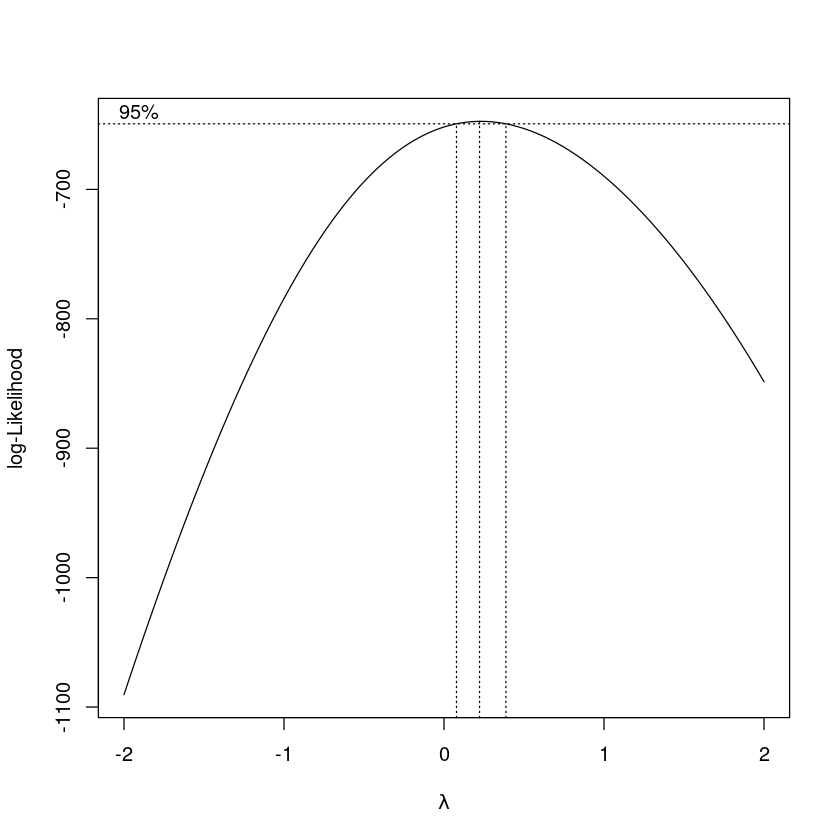

In [ ]:
#2.9 Use Box-Cox transformation to improve the model. 
library(MASS)
boxcox = boxcox(optimal_fit) # посмотрим на графике


# найдем точное значение лямбды (на оси х)
# оно дает наибольшее значение функции правдоподобия
which.max(boxcox$y)
lambda = boxcox$x[which.max(boxcox$y)]
lambda

# теперь преобразуем нашу зависимую перменную, возводя ее в степень лямбда
temp = realEstate$Y.house.price.of.unit.area^lambda
realEstate$Y.house.price.of.unit.area = temp

# строим новую модель
fit2 <- lm(Y.house.price.of.unit.area ~ X2.house.age + X3.distance.to.the.nearest.MRT.station + X4.number.of.convenience.stores, data = realEstate)

summary(fit2)

#2.10 What is the “best” model? Advantages and disadvantages of the best model?
# Adjusted R-squared:  0.5377 - first model
# Adjusted R-squared:  0.6204  - after box- cox transformation